# Survey analysis

This notebook is a first exploration of the survey conducted on software practices at CREST

TODO : 

- questions about softwares to analyze
- identify results
- syntetize plain text answers

In [1]:
#!pip install openpyxl
import pandas as pd
import matplotlib.pyplot as plt

## Load and clean data

- remove questionnary finished in less than 1 minutes

In [2]:
df = pd.read_csv("../data/results-survey323625.csv")
#t = pd.DataFrame(pd.Series(list(df.columns)))
#t["reco"] = None
#t.to_csv("reco_columns.csv", index=False)
reco_col = pd.read_csv("./reco_columns.csv") 
reco_col = dict(reco_col.set_index("0").dropna()["reco"])
print(df.shape)
df.columns = [(lambda i: reco_col[i] if i in reco_col else i)(i) for i in df.columns]
df.head(2)

# filter 
f = df["time"]>60
df = df[f]
print("Number of respondents", len(df))

(88, 177)
Number of respondents 75


## Exploratory analysis of questions

Mean time: 9.8


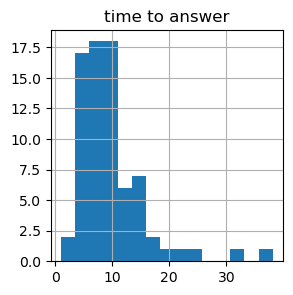

In [3]:
fix,ax = plt.subplots(figsize=(3,3))
(df["time"]/60).hist(bins=15)
plt.title("time to answer")
print(f"Mean time: {(df['time']/60).mean():.2}")

Around 10 minutes to answer

### Respondents profile

<Axes: xlabel='time_at_crest'>

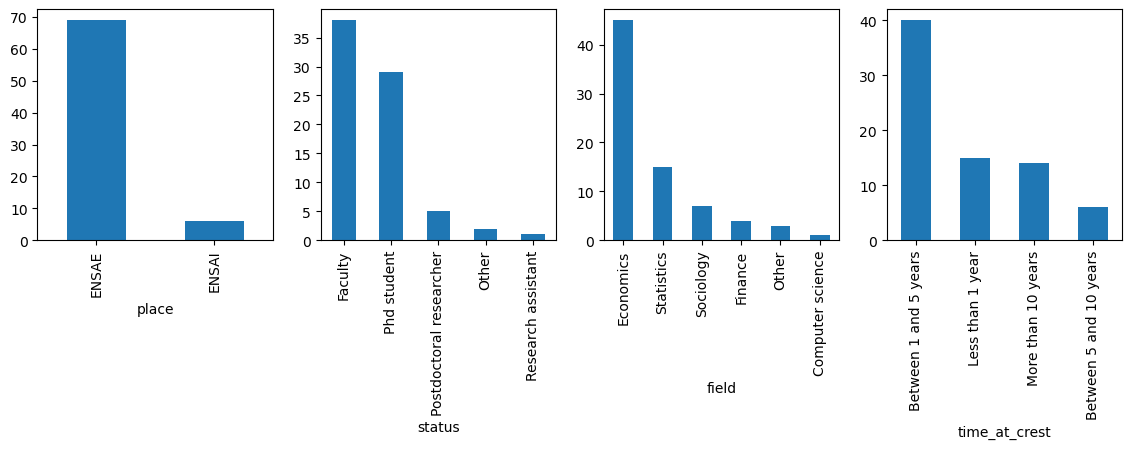

In [4]:
fix, ax = plt.subplots(1,4, figsize=(14,3))
df["place"].value_counts().plot(kind="bar", ax=ax[0])
df["status"].value_counts().plot(kind="bar", ax=ax[1])
df["field"].value_counts().plot(kind="bar", ax=ax[2])
df["time_at_crest"].value_counts().plot(kind="bar", ax=ax[3])

Respondants are mainly ENSAE, Faculty and economists

### Insights of practices

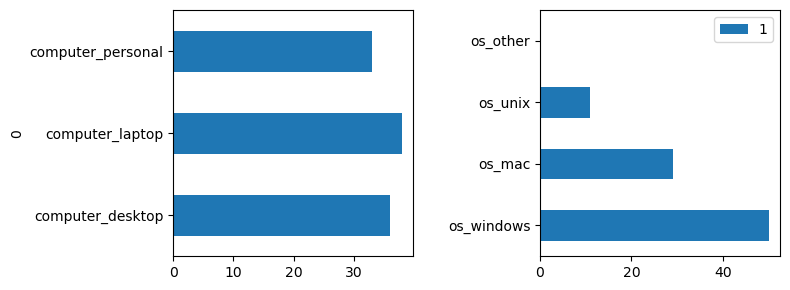

In [5]:
fix,ax = plt.subplots(1, 2, figsize=(8,3))
pd.DataFrame([[i, (df[i]=="Yes").sum()] for i in df.columns if "computer_" in i]).set_index(0).plot(kind="barh", ax=ax[0], legend=False)
pd.DataFrame([[i, (df[i]=="Yes").sum()] for i in df.columns if "os_" in i]).set_index(0).plot(kind="barh", ax=ax[1])
plt.tight_layout()
plt.ylabel("");

A diversity of computer used ; mainly windows for the OS

Do you still need a desktop computer ? A majority of yes !

In [6]:
df["dedicated_desktop"].value_counts()

dedicated_desktop
Yes    42
No     33
Name: count, dtype: int64

### Software practices

The landscape of the software used at CREST

TODO : established a list?

In [7]:
df["essential_software"].dropna()[0:10]

1                  R, STATA, Python, Winedt, Office 365
2     Matlab, Stata, Mathematica, Arcgis, and Spss.\...
3                   TekMaker\nR\nMatlab\nPython\nGurobi
5              Python, Stata, r, matlab, windows office
6                                                Python
9     StatTransfer, Stata, R, Windows Package (Word,...
10    Microsoft Office, Overleaf, Dropbox, R, Python...
11     mainly R, sometimes Python, SAS, Stata and Excel
12    LaTeX, python, VSCode, Zotero.\nMS Word, MS Ou...
14    Rstudio, python, putty, winscp, mailbox, overl...
Name: essential_software, dtype: object

In [22]:
softwares = ["python", "matlab", "stata"]
print(len(df["essential_software"].dropna()))
for s in softwares:
    print(s, (df["essential_software"].dropna().str.lower().str.contains(s)).mean())

57
python 0.47368421052631576
matlab 0.3684210526315789
stata 0.5614035087719298


[('stata', 31), ('r', 25), ('python', 22), ('matlab', 20), ('dropbox', 16), ('latex', 13), ('overleaf', 8), ('rstudio', 8), ('zoom', 7), ('mathematica', 5), ('excel', 5), ('zotero', 5), ('winedt', 4), ('microsoft office', 4), ('julia', 4), ('acrobat', 4), ('chatgpt', 4), ('teams', 4), ('sas', 3), ('jupyter', 3), ('windows office', 2), ('vscode', 2), ('putty', 2), ('winscp', 2), ('notepad++', 2), ('git', 2), ('miktex', 2), ('anaconda', 2), ('qgis', 2), ('github', 2), ('jupyter notebooks', 2), ('scientific word', 2), ('vs code', 2), ('r studio', 2), ('inkscape', 2), ('github desktop', 2), ('office 365', 1), ('arcgis', 1), ('spss.', 1), ('and chrome', 1), (')', 1), ('tekmaker', 1), ('gurobi', 1), ('stattransfer', 1), ('windows package (word', 1), ('ppoint', 1), ('etc.)', 1), ('gdrive', 1), ('adobe', 1), ('mainly r', 1), ('sometimes python', 1), ('zotero.', 1), ('ms word', 1), ('ms outlook', 1), ('ms teams.', 1), ('web browser (firefox).', 1), ('mailbox', 1), ('overleaf (plmlatex)', 1), ('

Text(0.5, 1.0, 'Essential software for the researcher')

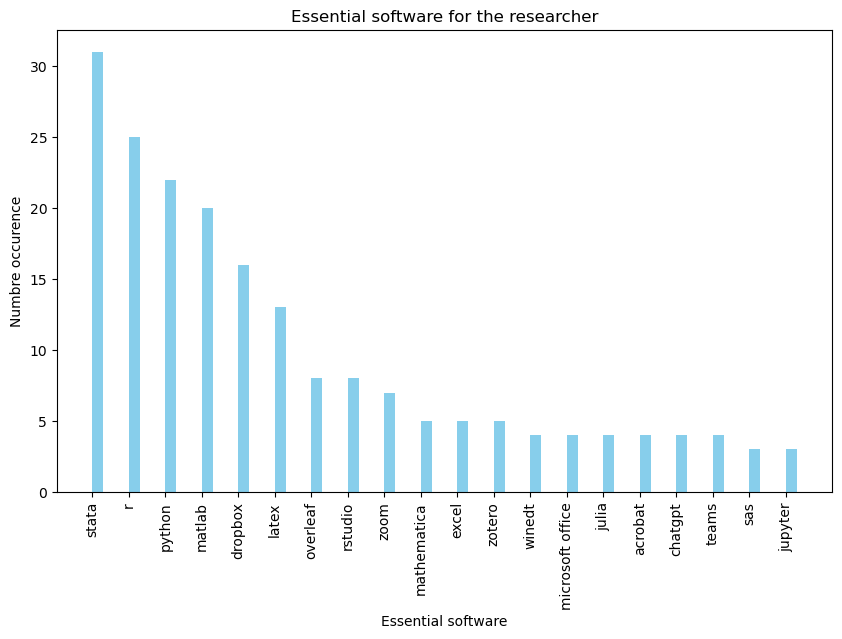

In [66]:
from collections import Counter

answer_non_vide = df["essential_software"].dropna()
words_lists=answer_non_vide.str.split(r',|\n|and|-|/|&|;|:') 

# Supprimer les espaces dans les champs de chaque liste
words_lists = words_lists.apply(lambda x: [word.strip().lower() for word in x])

# Compter les mots dans toutes les listes combinées
from collections import Counter
all_words = [word for sublist in words_lists for word in sublist]
word_count = Counter(all_words)
# Afficher les mots les plus fréquents
word_count_list  = word_count.most_common() 
word_count_list = [item for item in word_count_list if item[0] != '']
print(word_count_list)

# Séparer les mots et les fréquences
words, counts = zip(*word_count_list)

# Créer un histogramme
nb_value = 20
plt.figure(figsize=(10, 6))
plt.bar(words[:nb_value], counts[:nb_value], color='skyblue', align='edge', width=0.3)


# Ajouter des labels et un titre
plt.xlabel('Essential software')
plt.ylabel('Numbre occurence')
plt.xticks(rotation='vertical')
plt.title('Essential software for the researcher')


The essential softwares are Stata, R, Python, Matlab, Dropbox and Latex. 

TODO : On each field, see which are the essential software

TODO : analyse of the  question Among the software offer by the GENES (installed specifically on the computers), which ones do you use?  There are many software programs; only answer for those you are using  This question is important since the IT team will deactivate unused softwares

#### Paying for software ?

In [54]:
df["paying_software_projects"].value_counts()

No     60
Yes    12
Name: paying_software_projects, dtype: int64

Few software payed by projects

In [56]:
df["paying_software_projects_precision"].dropna()

2                          CEIC database and Bloomberg.
6        No me but the PI of my team : Prodigy, Chatgpt
9                                   Latent Gold & MPlus
20                                   Grammarly, dropbox
40                                              ChatGPT
46                                               maxqda
47                       WinEdt installed on my laptops
58                                             CASD box
68    I have a premium ChatGPT account paid for by a...
Name: paying_software_projects_precision, dtype: object

A lot of software paid from researcher's poket

In [57]:
df["paying_software_perso"].value_counts()

No     39
Yes    33
Name: paying_software_perso, dtype: int64

In [58]:
df["paying_software_perso_precision"].value_counts()

Dropbox                                                                8
Mentimeter                                                             1
Dropbox, Paperpile, Google Drive, Overleaf, Freedom App                1
Overleaf, Claude (AI)                                                  1
Grammarly Premium, ChatGPT, Google Drive, elicit, lateral              1
OCR online/pdf viewer, dropbox, Claude, ChatGPT                        1
dropbox                                                                1
Qualitative coding software (NVivo)                                    1
Google Drive (which I use both for work and for personal documents)    1
Heroku to deploy a web app, GitHub for large file storage, Dropbox     1
Dropbox account                                                        1
sublime text, zotero, owl (thunderbird add on for exchange), gpt4      1
Google Colab Mendeley Github                                           1
Dropbox, ChatGPT                                   

What are the software needed ? Few demands

In [61]:
list(df["software_need"].dropna())

['Bloomberg!',
 'No',
 'I would really like to have chatgpt premium as well',
 'I could not find QGIS or ArcGis in "Ulysse_Prod_App" thus I use QGIS on my personal laptop.',
 'no',
 'No',
 'Overleaf\nLimesurvey',
 'ChatGPT',
 'docker',
 'exchange alternative for linux, sublime text premium',
 'Acrobat Pro on my laptop',
 'Dropbox/Google drive (any cloud storage space)',
 'OCR software (Adobe pro or a less expensive one), LLM software',
 'My foreign partners use box.com rather than OneDrive or Dropbox',
 'Premium overleaf account']

In [63]:
df["training_offer"].value_counts()

No     41
Yes    30
Name: training_offer, dtype: int64

Suggestions :

In [78]:
list(df["training_offer_ideas"].dropna())

['If not a training, at least information on available software. Maybe short training on a few depending on the demand. ',
 'No, maybe the new software installed',
 'It would be great to have a mandatory course for Git, for all researchers',
 'Explain the resources available at CREST',
 'Trainings on how to use git tools for instance.',
 'Help using Github and/or parallel CPU/GPU coding with Matlab',
 'data management',
 'Some training sessions about existing IT offerings for junior faculty joining CREST (But that might come later)',
 'Trainings on how to use Onyxia and Spark',
 'Perhaps a presentation of available software solutions once a year would be helpful, but maybe this is already organized and I am just not aware of it',
 'Git, onyxia, ']

Not a strong demand of training : GIT, overview, Onyxia

### Computational practices

In [70]:
df["digital_processing"].value_counts()

Yes    61
No     11
Name: digital_processing, dtype: int64

A majority of digital analysis

In [75]:
pd.concat({i:df[i].value_counts() for i in ["data_numeric","data_text","data_image", "data_audio"]})

data_numeric  Yes    60
              No      1
data_text     Yes    35
              No     26
data_image    No     54
              Yes     7
data_audio    No     58
              Yes     3
dtype: int64

In [92]:
pd.concat({v.replace("On which computers do you perform these data processing tasks/computations ?","Computation"):df[v].value_counts() for v in [i for i in df.columns if "On which computers do you perform these data processing tasks/computations ?" in i]}, axis=1)

,"Computation [Locally, with my office computer]","Computation [Locally, on my laptop (GENES/CREST or personal)]","Computation [Locally, on a dedicated computer]",Computation [With GENES servers],Computation [With server outside GENES infrastructure]
No,44,24,69,44,54
Yes,28,48,3,28,18


Some demands for more computationnal power

In [81]:
df["enough_ressources"].value_counts()

Yes    60
No     12
Name: enough_ressources, dtype: int64

In [84]:
list(df["enough_ressources_no"].dropna())

['Our department bought almost no database',
 "I'm fine because I am part of 3 teams with access to clusters. ",
 "My research is in computational statistics and machine learning. You can't seriously compete with other teams in this field without access to big clusters (100s of CPU cores, GPUs). ",
 'lack of GPU for large (70B+) LLM for data annotation',
 'I would need to have access to a powerful server to which I can have access from home in an efficient way. The current one is too slow so in the end I do not use it. ',
 "I'd love a local gpu, not the Google colab one",
 '8GB of RAM is really really low to do research + the storage is very limited on CREST’s PCs.',
 'I have storage issue',
 'Need more cores, GPUs, or parallel servers for more powerful parallel computing']

In [95]:
df["enough_storage"].value_counts()

Yes    53
No     17
Name: enough_storage, dtype: int64

In [98]:
list(df["enough_storage_no"].dropna())

['More memory for Genes/CREST laptops is needed (250Go is not sufficient; is what I got :-( )\nThe space on the Genes Dropbox is sufficient',
 'I need a reliable backup solution.',
 'I have hard time sharing them from my personal laptop to my crest computer',
 "Sorry, I haven't used the servers yet so I'm not sure.",
 "I'm currently storing data on Dropbox. This is convenient so that I can access them from the office, from home and when I'm visiting other universities. At some point, I guess Dropbox will not have enough space.",
 'My co-authors at other research institutions (Berkeley, Chicago, Columbia, Harvard) all use Dropbox and/or Google Drive to store the data involved in our research projects. To work collaboratively on our projects, I therefore need to use Dropbox and Google Drive, on which relatively large amounts of data are stored (about 3 To for my currently active projects). The free tier plans are not sufficient: I need to pay for increased storage on both Dropbox and Dri

Dataset size

In [85]:
df["dataset_size"].value_counts()

Approximately 10 Go    21
Less than 1 Go         20
Approximately 1 Go     18
You don't know          8
More than 100 Go        5
Name: dataset_size, dtype: int64

In [93]:
pd.concat({v.replace("Where do you currently store your data ?","Storage"):df[v].value_counts() for v in [i for i in df.columns if "Where do you currently store your data ?" in i]}, axis=1)

,"Storage [Locally, with my office computer]","Storage [Locally, on my laptop (GENES/CREST or personal)]","Storage [Locally, on a dedicated computer]",Storage [With the ABRA server in GENES],Storage [With other GENES servers (than ABRA)],Storage [With the CASD outside GENES],Storage [With other servers outside GENES]
No,50,27,70,68,59,56,49
Yes,22,45,2,4,13,16,23


### Various practices

In [99]:
df["experimentation"].value_counts()

No, it is not my methodology                          44
Yes, sometimes                                        12
Yes, frequently                                        9
No, but I plan at some time in the future to do it     7
Name: experimentation, dtype: int64

Mostly numerical data

In [105]:
df["onyxia"].value_counts()

onyxia
Yes, I heard about it but never used    15
No, not at all                          11
Yes, and I tried it at least once        9
Yes, and I use it for my research        7
Name: count, dtype: int64

In [101]:
df["abra"].value_counts()

Never heard of it           47
No, never                   22
Yes, I am still using it     3
Name: abra, dtype: int64

In [113]:
pd.concat({v:df[v].value_counts() for v in ["programmation_r", "programmation_python", "programmation_julia", "programmation_stata", "programmation_matlab", "programmation_sas"]}, axis=1)

,programmation_r,programmation_python,programmation_julia,programmation_stata,programmation_matlab,programmation_sas
Yes,44,53,10,37,28,9
No,28,19,62,35,44,63


An important use of generative models

In [116]:
df["gpt_use"].value_counts()

Yes, a lot       29
Yes, sometime    24
No               17
Name: gpt_use, dtype: int64

In [121]:
df["gpt_use_choice"].value_counts()

You use only free access solutions              50
You have one (or many) personal subscription    10
You have a professional subscription             5
Name: gpt_use_choice, dtype: int64

In [119]:
list(df["gpt_use_reason"].dropna())

['editing english, code',
 'Boring simple tasks (create tikz code, format text...) + a bit a coding help',
 'Programming ; writing',
 'Summarize articles, draft text',
 'To help me write my code',
 'As help for coding',
 'Editorial services: reformulating, summarising, etc. ',
 'English correction, coding snippets',
 'For proofreading texts and understanding code written by others.',
 'coding and writing',
 'Quick responses to various questions, code, photo edit, ',
 'pproofreading, coding',
 'For the code (R especially)\nTo correct mistakes when I write in English',
 'Formatting reference lists, doing preliminary literature checks, helping with coding questions…',
 'Small questions usually. Reformulation, clues on code function',
 'Reformulating emails, reformulation drafts of papers. I would like to use it more to help me program (but the free version is bad in Matlab).',
 'ChatGPT for writing and coding',
 'Latex, some code generation, emails',
 "I don't use them in my research but 

### Advanced exploration

In [115]:
df["reproducibility"].value_counts()

These are important issues in your activity                  36
You have encountered these issues in your activity           22
These are distant or non-existent issues in your activity    12
Name: reproducibility, dtype: int64

In [122]:
df["opensource"].value_counts()

You are actively involved in this trend                                  30
You are not actively using them, but you are interested in this trend    25
You are not familiar with this trend                                     15
Name: opensource, dtype: int64

### Comments

Evolutions

In [126]:
list(df["evolution"].dropna())

['CASD is very expensive and many data providers to not require that much security. An in-home solution of storage with a local controlled access would be sufficient for many storage of simple dataset which require a minimum level of GDPR security and it would save a lot of research funds to not use CASD for them.',
 'I will need more GPU',
 'Computational power would be crucial. \nUser friendly interfaces offering access to computational resources are necessary. \nUpdated versions of software are required. ',
 'Not that i know',
 'No',
 'I will turn more to empirics, so will use more intensively my access to the servers?',
 'I will potentially need to run code which require GPUs.',
 "In terms of architecture, I'm overall satisfied with what we have in the department. The only need I have that is not currently fulfilled would be a computing server sufficient secure to store confidential data. Something in between the existing computing servers and CASD (which cannot host easily confide

General comments

In [127]:
for i in list(df["general_comments"].dropna()):
    print("\n"+i)


Could CREST offer VPN service?

There is a VPN service from X, but many databases we have access to are based under the name of ENSAE...

I'm not sure what are ABRA servers, if you mean the clusters (tortank...etc) then I use them yes. They are very convenient and easy to use I think keeping them updated and improving them would be useful (adding a local storage option to replace CASD as mentioned would be nice). Now, I have the impression that not all of them are fully updated with all softwares, a few colleagues have been directed toward the cluster number 6 because Python is not updated on the other clusters. This is problematic because then everybody starts to use the same server and it becomes slow. Maintaining up to date all the HPC is important.

It's Emilien

Stop providing laptops which are remotely controlled by DSI!
This is the rule imposed at Ensai.
It's a huge waste of time for the researchers, counter-productive. 
Explain again and again to Ensai DSI that researchers at 